# PARKINSON DISEASE PREDICTION USING SPEECH PARAMETERS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("parkinsons.csv")

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [4]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
df.shape

(195, 24)

In [9]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

The value with 1 are the ones that are effected by the parkinson disease and 0 are the healthy ones

In [11]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [12]:
X = df.drop(columns=['name', 'status'], axis=1)
#X = df.drop(columns=['status'], axis=1)

Y=df['status']

In [13]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [14]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


# DATA STANDARDIZATION 

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (130, 22) (65, 22)


In [17]:
ss = StandardScaler()

In [18]:
ss.fit(X_train)

StandardScaler()

In [19]:
X_train= ss.transform(X_train)
X_test= ss.transform(X_test)

In [20]:
print(X_train)

[[-0.8127777  -0.74971864 -0.69550304 ...  0.30722461  0.28708058
   0.22583315]
 [-0.65032209 -0.57738203  0.00673368 ...  0.37573421  1.4583524
   1.6899304 ]
 [ 0.46972111  0.15354041 -0.96388859 ... -0.04480306  0.46812647
  -0.6690313 ]
 ...
 [-0.09200276 -0.31737169  0.62346913 ... -1.74694433 -0.13723323
  -0.25659973]
 [-0.09518526 -0.41527366  0.45099327 ...  0.13467191  1.09825903
  -0.19074532]
 [-0.31522194  4.26498867 -1.18593521 ...  0.50065479  0.71784111
   2.46879781]]


In [21]:
print(X_test)

[[-0.98095687 -0.73454476 -0.28439359 ...  0.93557759  0.04759976
  -0.01705049]
 [-0.19275731  1.68555907 -0.79129391 ...  0.1210118  -0.33419977
   0.07763171]
 [-0.84203698 -0.7265013  -0.48498173 ... -0.27059455  0.09779187
  -0.04802032]
 ...
 [-0.37191488 -0.37305636  0.3615235  ... -0.94807968 -0.88493139
  -0.76284824]
 [ 1.01220194  0.15992083 -0.84991859 ...  0.59948467  0.51511866
  -0.26526284]
 [ 0.79078371  0.02554067  1.20990606 ... -2.04729472 -0.09480777
  -1.00324163]]


# IMPLEMENTATION OF MACHINE LEARNING ALGORITHMS

# SVM Classification 

In [22]:
model = svm.SVC(kernel = 'linear')

In [23]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [24]:
X_train_pred = model.predict(X_train)
train_data_acc= accuracy_score(Y_train, X_train_pred)

We are perfroming the prediction and checking the accuracy for both training and testing data

In [25]:
print("accuracy of training data :", train_data_acc)

accuracy of training data : 0.9076923076923077


In [26]:
X_test_pred=model.predict(X_test)
test_data_acc = accuracy_score(Y_test, X_test_pred)

In [27]:
print("accuracy of testing data:", test_data_acc)

accuracy of testing data: 0.8769230769230769


If the training as testing values are have a huge difference then the model is either overfitting or underfitting

The values for the classification and regression are same because we have a classified dependent variable that is the detection is in the form of 0 or 1

[[11  6]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.88      0.96      0.92        48

    accuracy                           0.88        65
   macro avg       0.87      0.80      0.83        65
weighted avg       0.87      0.88      0.87        65



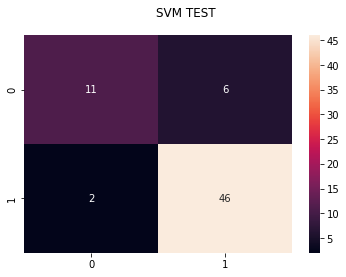

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, X_test_pred))

print(classification_report(Y_test, X_test_pred))


cm=confusion_matrix(Y_test,X_test_pred)
sns.heatmap(cm,annot=True)
plt.suptitle('SVM TEST')
plt.show()

[[20 11]
 [ 1 98]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77        31
           1       0.90      0.99      0.94        99

    accuracy                           0.91       130
   macro avg       0.93      0.82      0.86       130
weighted avg       0.91      0.91      0.90       130



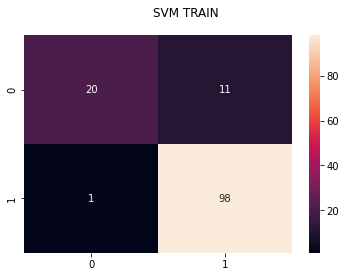

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_train, X_train_pred))

print(classification_report(Y_train, X_train_pred))


cm=confusion_matrix(Y_train,X_train_pred)
sns.heatmap(cm,annot=True)
plt.suptitle('SVM TRAIN')
plt.show()

In [30]:
#building predictor system
input_data=(162.568,198.346,77.63,0.00502,0.00003,0.0028,0.00253,0.00841,0.01791,0.168,0.00793,0.01057,0.01799,0.0238,0.0117,25.678,0.427785,0.723797,-6.635729,0.209866,1.957961,0.135242)
#changing input data to numpy array
input_data_np= np.asarray(input_data)

#reshape numpy array
input_data_re = input_data_np.reshape(1,-1)

#standardize the data
s_data = ss.transform(input_data_re)

pred = model.predict(s_data)

print(pred)

if(pred[0]==0):
    print("Negative, No Parkinson's found")
else:
    print("Positive, Parkinson Found")

[1]
Positive, Parkinson Found


C:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
#building predictor system
input_data=(197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.0068,0.00802,0.01689,0.00339,26.775,0.422229,0.741367,-7.3483,0.177551,1.743867,0.085569)
#changing input data to numpy array
input_data_np= np.asarray(input_data)

#reshape numpy array
input_data_re = input_data_np.reshape(1,-1)

#standardize the data
s_data = ss.transform(input_data_re)

pred = model.predict(s_data)

print(pred)

if(pred[0]==0):
    print("Negative, No Parkinson's found")
else:
    print("Positive, Parkinson Found")

[0]
Negative, No Parkinson's found


C:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# KNN ALGORITHM APPLICATION

[[16  1]
 [ 3 45]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.98      0.94      0.96        48

    accuracy                           0.94        65
   macro avg       0.91      0.94      0.92        65
weighted avg       0.94      0.94      0.94        65



C:\Users\prana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


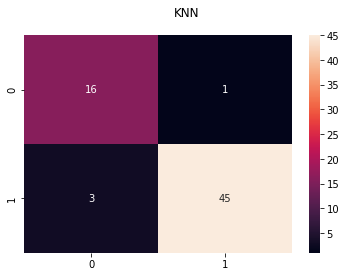

In [32]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, knn_pred))

print(classification_report(Y_test, knn_pred))





cm=confusion_matrix(Y_test,knn_pred)
sns.heatmap(cm,annot=True)
plt.suptitle('KNN')
plt.show()

C:\Users\prana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

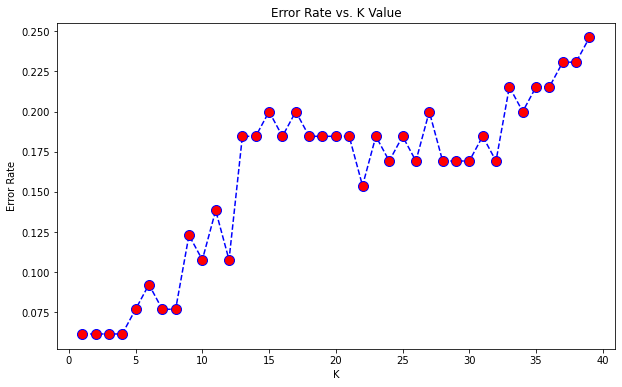

In [33]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

WITH K = 1


[[16  1]
 [ 3 45]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.98      0.94      0.96        48

    accuracy                           0.94        65
   macro avg       0.91      0.94      0.92        65
weighted avg       0.94      0.94      0.94        65

WITH K = 30


[[ 6 11]
 [ 0 48]]


              precision    recall  f1-score   support

           0       1.00      0.35      0.52        17
           1       0.81      1.00      0.90        48

    accuracy                           0.83        65
   macro avg       0.91      0.68      0.71        65
weighted avg       0.86      0.83      0.80        65



C:\Users\prana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

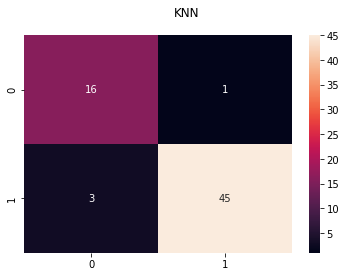

In [34]:
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
 
print('WITH K = 1')
print('\n')
print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))
 
 
# NOW WITH K = 30
knn = KNeighborsClassifier(n_neighbors = 30)
 
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
 
print('WITH K = 30')
print('\n')
print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))





cm=confusion_matrix(Y_test,knn_pred)
sns.heatmap(cm,annot=True)
plt.suptitle('KNN')
plt.show()



# Naive Bayes - Gaussian 

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

73.84615384615385
[[14  3]
 [14 34]]


In [42]:
print("f1 score of naive Classifier:",metrics.f1_score(Y_test,Y_pred))
print("Recall Score of naive Classifier:",metrics.recall_score(Y_test,Y_pred,average='macro'))
print("Precision Score of naive Tree Classifier:",metrics.precision_score(Y_test,Y_pred,average='macro'))


f1 score of naive Classifier: 0.8000000000000002
Recall Score of naive Classifier: 0.7659313725490196
Precision Score of naive Tree Classifier: 0.7094594594594594


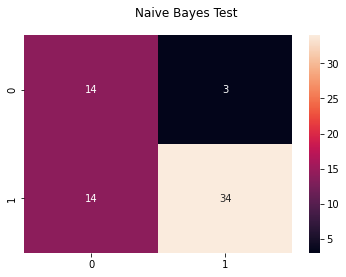

In [43]:
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)
plt.suptitle('Naive Bayes Test')
plt.show()

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
Y_pred = gnb.fit(X_test, Y_test).predict(X_train)
print(accuracy_score(Y_train, Y_pred)*100)
cm = confusion_matrix(Y_train, Y_pred)
print(cm)

72.3076923076923
[[27  4]
 [32 67]]


In [45]:
print("Accuracy of Naive Bayes Classifier:",metrics.accuracy_score(Y_train,Y_pred))
print("Recall Score of Naive Bayes Classifier:",metrics.recall_score(Y_train,Y_pred,average='macro'))
print("Precision Score of Naive Bayes Classifier:",metrics.precision_score(Y_train,Y_pred,average='macro'))
print("f1 Score of Naive Bayes Classifier:",metrics.f1_score(Y_train,Y_pred,average='macro'))

Accuracy of Naive Bayes Classifier: 0.7230769230769231
Recall Score of Naive Bayes Classifier: 0.7738677093515803
Precision Score of Naive Bayes Classifier: 0.7006445452375268
f1 Score of Naive Bayes Classifier: 0.6941176470588235


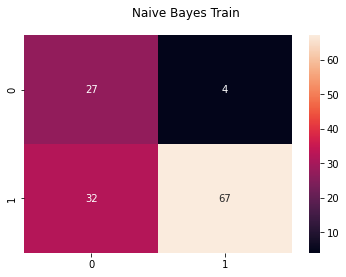

In [46]:
cm=confusion_matrix(Y_train,Y_pred)
sns.heatmap(cm,annot=True)
plt.suptitle('Naive Bayes Train')
plt.show()

# Decision Tree Classifier 

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(criterion="entropy",max_depth=10)
clf=clf.fit(X_train,Y_train)
Y_pred1=clf.predict(X_test)
Y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred1))

print(classification_report(Y_test, Y_pred1))

[[12  5]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.90      0.96      0.93        48

    accuracy                           0.89        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.89      0.89      0.89        65



In [49]:
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(Y_test,Y_pred1))
print("Recall Score of Decision Tree Classifier:",metrics.recall_score(Y_test,Y_pred1,average='macro'))
print("Precision Score of Decision Tree Classifier:",metrics.precision_score(Y_test,Y_pred1,average='macro'))


Accuracy of Decision Tree Classifier: 0.8923076923076924
Recall Score of Decision Tree Classifier: 0.8321078431372549
Precision Score of Decision Tree Classifier: 0.8795518207282913


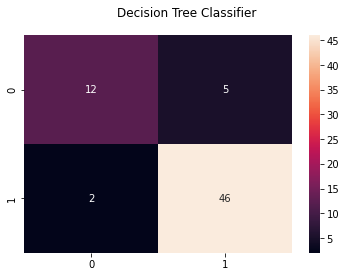

In [50]:
cm=confusion_matrix(Y_test,Y_pred1)
sns.heatmap(cm,annot=True)
plt.suptitle('Decision Tree Classifier')
plt.show()

# XGBOOST CLASSIFIER

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, Y_train)
Y_pred2 = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred2)
print('XGBoost classifier',accuracy*100)

XGBoost classifier 95.38461538461539


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred2))

print(classification_report(Y_test, Y_pred2))

[[14  3]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.94      1.00      0.97        48

    accuracy                           0.95        65
   macro avg       0.97      0.91      0.94        65
weighted avg       0.96      0.95      0.95        65



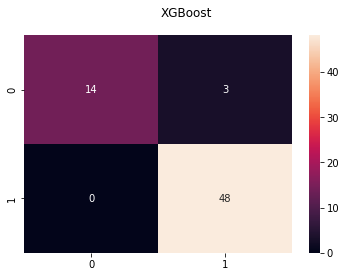

In [53]:
cm=confusion_matrix(Y_test,Y_pred2)
sns.heatmap(cm,annot=True)
plt.suptitle('XGBoost')
plt.show()

In [54]:
print("Accuracy of XGBoost:",metrics.accuracy_score(Y_test,Y_pred2))
print("Recall Score of XGBoost:",metrics.recall_score(Y_test,Y_pred2,average='macro'))
print("Precision Score of XGBoost:",metrics.precision_score(Y_test,Y_pred2,average='macro'))


Accuracy of XGBoost: 0.9538461538461539
Recall Score of XGBoost: 0.9117647058823529
Precision Score of XGBoost: 0.9705882352941176


# LOGISTIC REGRESSION 

In [55]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=1000000,dual=False)
logModel.fit(X_train, Y_train,)
predictions = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)*100

84.61538461538461

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predictions))

print(classification_report(Y_test, predictions))

[[10  7]
 [ 3 45]]
              precision    recall  f1-score   support

           0       0.77      0.59      0.67        17
           1       0.87      0.94      0.90        48

    accuracy                           0.85        65
   macro avg       0.82      0.76      0.78        65
weighted avg       0.84      0.85      0.84        65



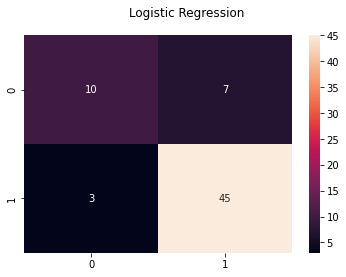

In [57]:
cm=confusion_matrix(Y_test,predictions)
sns.heatmap(cm,annot=True)
plt.suptitle('Logistic Regression')
plt.show()

# LIGHTGBM

In [58]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, y_pred)*100))

LightGBM Model accuracy score: 92.3077


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))

print(classification_report(Y_test, y_pred))

[[12  5]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.91      1.00      0.95        48

    accuracy                           0.92        65
   macro avg       0.95      0.85      0.89        65
weighted avg       0.93      0.92      0.92        65



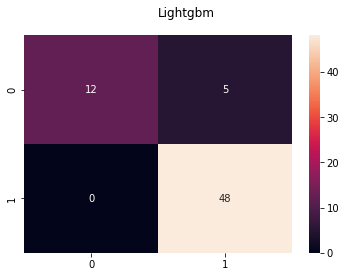

In [60]:
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.suptitle('Lightgbm')
plt.show()